# Sales Analysis for 45 Walmart Stores

This notebook shows data visualization and exploratory data analysis done on data of 45 walmart stores. The data is available at https://www.kaggle.com/datasets/varsharam/walmart-sales-dataset-of-45stores

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['font.family'] = 'bahnschrift'
mpl.rcParams['font.size'] = 14
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\opio\Desktop\Data Science\python_projects\EDA\walmart\walmart-sales-dataset-of-45stores.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Cleaning and Preprocessing

In [3]:
# Check general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# There are no null values, therefore no cleaning will be done

# But the 'Date' column will be changed to datetime type

df['Date'] = pd.to_datetime(df['Date'], format=('%d-%m-%Y'))

In [5]:
# Reduce sales column such that the figures can be easily displayed

df['Weekly_Sales'] = df['Weekly_Sales']/100000

In [6]:
# I will create categories for the sales data
# All sales below 1,000,000 will be 'Low', those between 1,000,000 and 2,000,000 will be 'Moderate' and those 
# above 2,000,000 will be 'High'

df['category'] = np.where(df['Weekly_Sales']<10, 'Low', 
                          (np.where(df['Weekly_Sales']<=20, 'Moderate', 'High')))
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,category
0,1,2010-02-05,16.436909,0,42.31,2.572,211.096358,8.106,Moderate
1,1,2010-02-12,16.419574,1,38.51,2.548,211.242170,8.106,Moderate
2,1,2010-02-19,16.119682,0,39.93,2.514,211.289143,8.106,Moderate
3,1,2010-02-26,14.097276,0,46.63,2.561,211.319643,8.106,Moderate
4,1,2010-03-05,15.548067,0,46.50,2.625,211.350143,8.106,Moderate


## Exploratory Data Analysis

In [7]:
# Get descriptive statistics

df.describe().round(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.0,6435.0,6435.0,6435.0,6435.0,6435.0,6435.0
mean,23.0,10.5,0.1,60.7,3.4,171.6,8.0
std,13.0,5.6,0.3,18.4,0.5,39.4,1.9
min,1.0,2.1,0.0,-2.1,2.5,126.1,3.9
25%,12.0,5.5,0.0,47.5,2.9,131.7,6.9
50%,23.0,9.6,0.0,62.7,3.4,182.6,7.9
75%,34.0,14.2,0.0,74.9,3.7,212.7,8.6
max,45.0,38.2,1.0,100.1,4.5,227.2,14.3


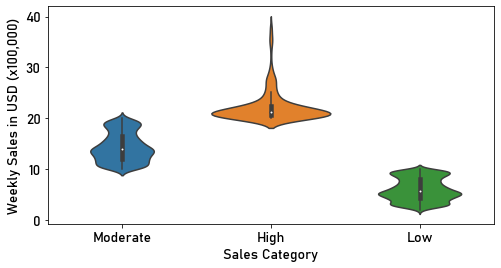

In [8]:
# Overall sales

fig, ax = plt.subplots(figsize=(8,4))
sns.violinplot(data=df, x='category', y='Weekly_Sales')
plt.xlabel('Sales Category')
plt.ylabel('Weekly Sales in USD (x100,000)')
plt.show()

## Highlights

### - In the low category, majority of the weekly sales are USD 500,000
### - In the moderate category, majority of the weekly sales are USD 1,400,000
### - In the high category, majority of the weekly sales are USD 2,200,000

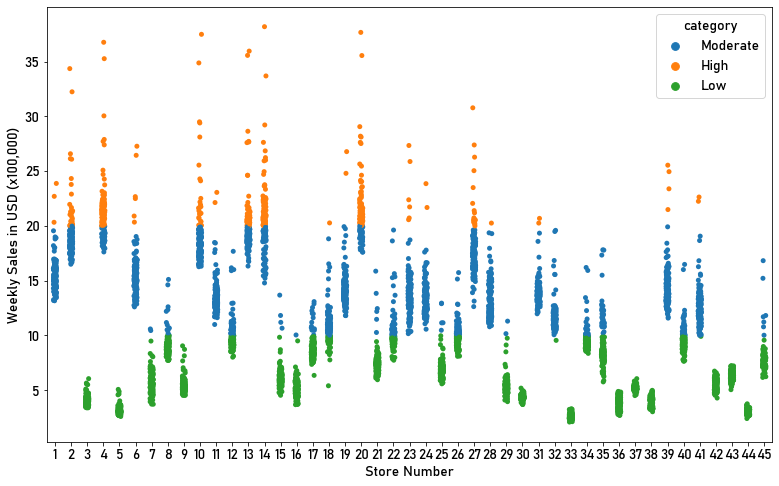

In [9]:
# Display stats of sales at each store

fig, ax = plt.subplots(figsize=(13,8))
sns.stripplot(data=df, x='Store', y='Weekly_Sales', hue='category')
plt.xlabel('Store Number')
plt.ylabel('Weekly Sales in USD (x100,000)')
plt.show()

## Highlights

### The plot above shows that;
### 1. The sales performance of some stores changes from one level to the other. These were;
###      a. From low to moderate. These were store number 7, 8, 12, 15, 16, 17, 18, 21, 22, 25, 26, 29, 32, 34, 35, 40, 45
###      b. From moderate to high. These were store number 1, 4, 6, 10, 11,13, 14, 18, 20, 23, 24, 27, 28, 31, 39, 41

### 2. Some stores had persistently low weekly sales. These were store number 3, 5, 30, 33, 36, 37, 38, 42, 43, 44. By contrast, there were no stores with only moderate or only high weekly sales.

### 3. The sales of store 18 transitioned through all the 3 sales categories.

In [10]:
# Now let me plot some of these highlighted cases.
# Select stores 3, 14, 18, 35
df_3 = df[df['Store'] == 3]
df_14 = df[df['Store'] == 14]
df_18 = df[df['Store'] == 18]
df_35 = df[df['Store'] == 35]

# Select all holidays
df_holiday = df.loc[df['Holiday_Flag'] == 1]

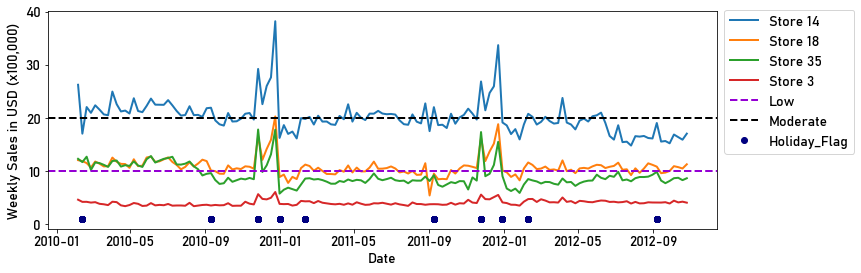

In [11]:
# Make the plots

fig, ax = plt.subplots(figsize=(12,4))
plt.plot('Date', 'Weekly_Sales', data=df_14, label='Store 14', linewidth=2)
plt.plot('Date', 'Weekly_Sales', data=df_18, label='Store 18', linewidth=2)
plt.plot('Date', 'Weekly_Sales', data=df_35, label='Store 35', linewidth=2)
plt.plot('Date', 'Weekly_Sales', data=df_3, label='Store 3', linewidth=2)
plt.axhline(y=10, color='darkviolet', linestyle='--', label='Low', linewidth=2)
plt.axhline(y=20, color='black', linestyle='--', label='Moderate', linewidth=2)
plt.plot('Date', 'Holiday_Flag', data=df_holiday, marker='o', linestyle='', color='navy')
plt.xlabel('Date')
plt.ylabel('Weekly Sales in USD (x100,000)')
plt.legend(bbox_to_anchor=(1, 1.04))
plt.show()

### Highlight 

### The plot above shows that the transitions from one level of sales into another happen on the same days, that is, at the start, during and at the end of the public holidays.

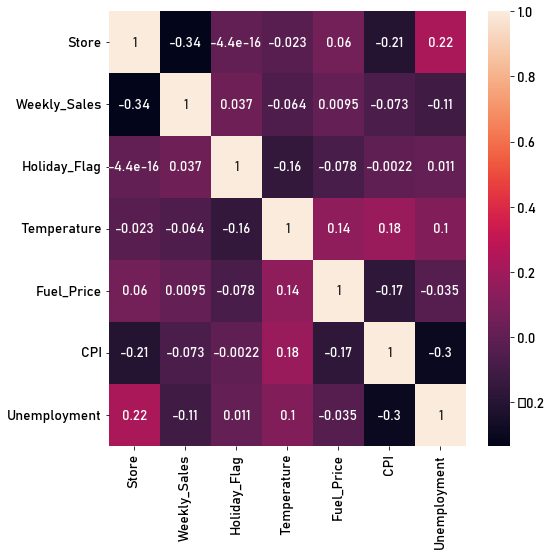

In [12]:
# Check corrleations with other data
correlation = df.corr('pearson')

fig, ax =plt.subplots(figsize=(8,8))
sns.heatmap(correlation, annot=True)
plt.show()

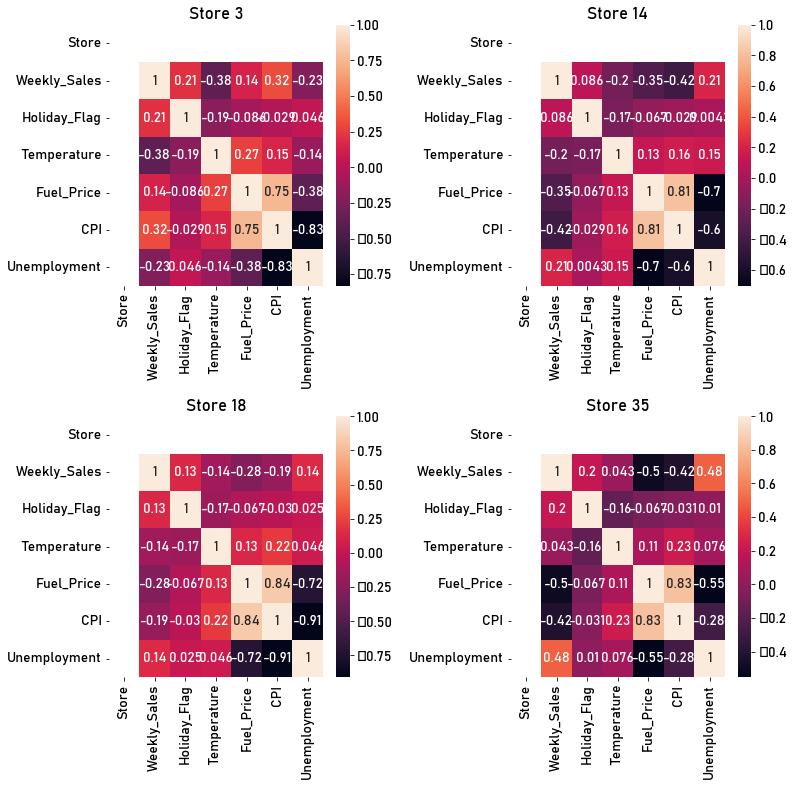

In [13]:
# The correlations with other data are low.

# But what if its done for specific stores. Let's focus aagin on the four selected stores

fig, ax = plt.subplots(figsize=(12,12))
plt.gcf().subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(2,2,1)
correlation_3 = df_3.corr('pearson')
sns.heatmap(correlation_3, annot=True)
plt.title('Store 3')

plt.subplot(2,2,2)
correlation_14 = df_14.corr('pearson')
sns.heatmap(correlation_14, annot=True)
plt.title('Store 14')

plt.subplot(2,2,3)
correlation_18 = df_18.corr('pearson')
sns.heatmap(correlation_18, annot=True)
plt.title('Store 18')

plt.subplot(2,2,4)
correlation_35 = df_35.corr('pearson')
sns.heatmap(correlation_35, annot=True)
plt.title('Store 35')
plt.show()

## Highlights

### The plot above show that the correlations change when individual stores are considered. Here are the highlights;
### - For store 3, the correlation between weekly sales and consumer price index (CPI) increased to 0.32
### - The correlation between CPI and unemployment and fuel price increased.
### - For stores 14 and 18, the correlation between CPI, unemployment and fuel price increased more than 2 fold
### - The correlation between weekly sales and unemployment is highest at store 35.